<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1946 entries, 0 to 1945
Data columns (total 29 columns):
REVENUE                         1946 non-null float64
CROSS_SELL_SUCCESS              1946 non-null int64
NAME                            1946 non-null object
EMAIL                           1946 non-null object
FIRST_NAME                      1946 non-null object
FAMILY_NAME                     1899 non-null object
TOTAL_MEALS_ORDERED             1946 non-null int64
UNIQUE_MEALS_PURCH              1946 non-null int64
CONTACTS_W_CUSTOMER_SERVICE     1946 non-null int64
PRODUCT_CATEGORIES_VIEWED       1946 non-null int64
AVG_TIME_PER_SITE_VISIT         1946 non-null float64
MOBILE_NUMBER                   1946 non-null int64
CANCELLATIONS_BEFORE_NOON       1946 non-null int64
CANCELLATIONS_AFTER_NOON        1946 non-null int64
TASTES_AND_PREFERENCES          1946 non-null int64
MOBILE_LOGINS                   1946 non-null int64
PC_LOGINS                       1946 non-null int64
W

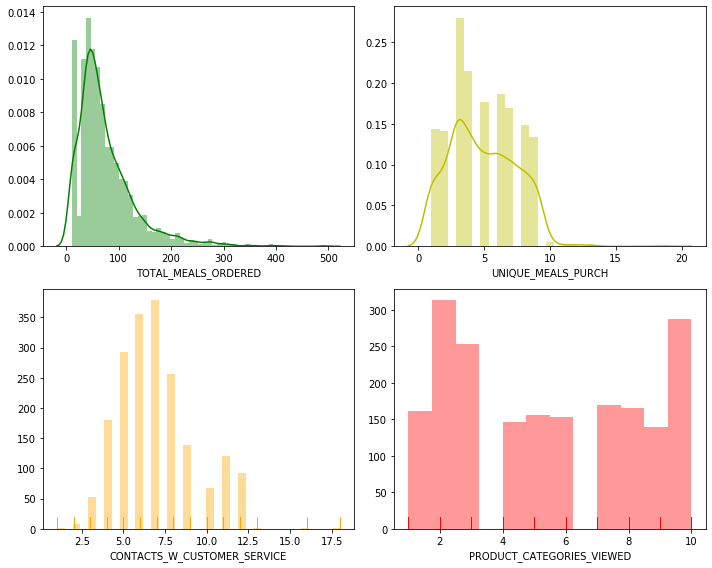

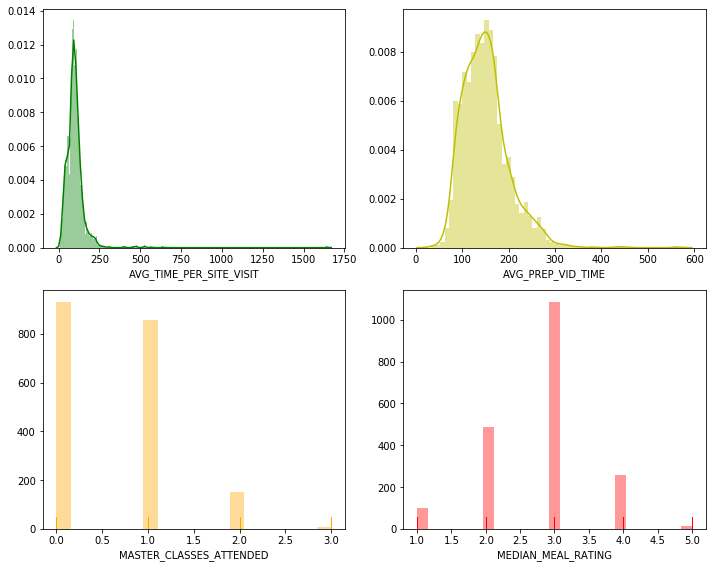

original_df['CROSS_SELL_SUCCESS'] +
original_df['TOTAL_MEALS_ORDERED'] +
original_df['UNIQUE_MEALS_PURCH'] +
original_df['CONTACTS_W_CUSTOMER_SERVICE'] +
original_df['PRODUCT_CATEGORIES_VIEWED'] +
original_df['AVG_TIME_PER_SITE_VISIT'] +
original_df['MOBILE_NUMBER'] +
original_df['CANCELLATIONS_BEFORE_NOON'] +
original_df['CANCELLATIONS_AFTER_NOON'] +
original_df['TASTES_AND_PREFERENCES'] +
original_df['MOBILE_LOGINS'] +
original_df['PC_LOGINS'] +
original_df['WEEKLY_PLAN'] +
original_df['EARLY_DELIVERIES'] +
original_df['LATE_DELIVERIES'] +
original_df['PACKAGE_LOCKER'] +
original_df['REFRIGERATED_LOCKER'] +
original_df['FOLLOWED_RECOMMENDATIONS_PCT'] +
original_df['AVG_PREP_VID_TIME'] +
original_df['LARGEST_ORDER_SIZE'] +
original_df['MASTER_CLASSES_ATTENDED'] +
original_df['MEDIAN_MEAL_RATING'] +
original_df['AVG_CLICKS_PER_VISIT'] +
original_df['TOTAL_PHOTOS_VIEWED'] +
original_df['out_total_meals'] +
original_df['out_unique_meals'] +
original_df['out_contacts_w_customer_service'] 

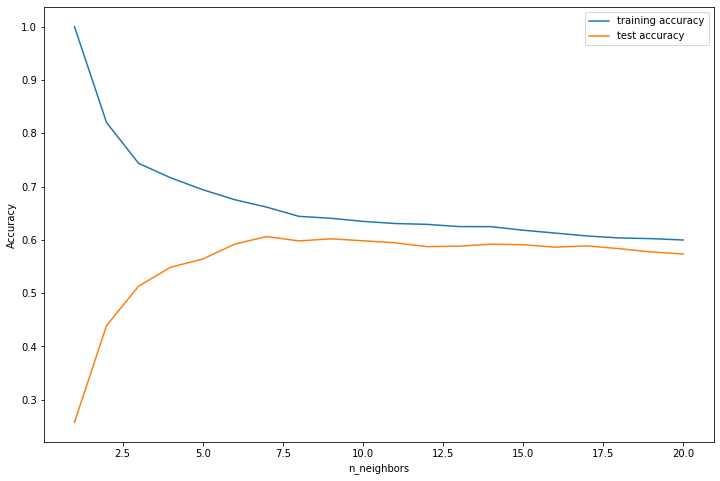

The optimal number of neighbors is 7
Training Score: 0.6613
Testing Score: 0.6061


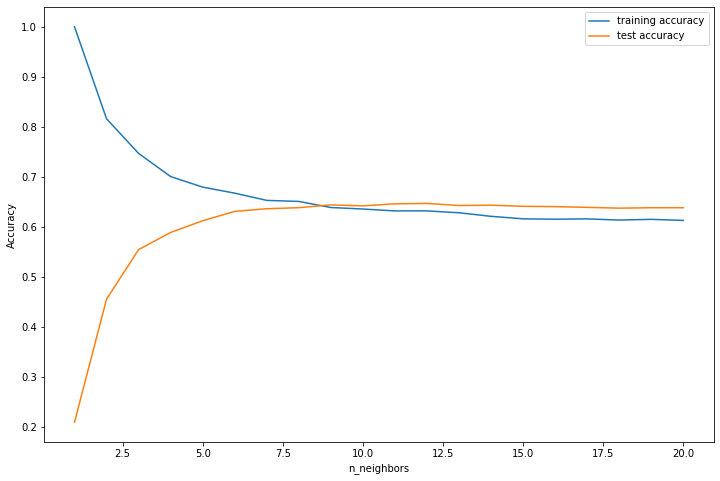

The optimal number of neighbors is 12
Training Score: 0.6316
Testing Score: 0.6465

KNN Model             Neighbors          Train Score                     Test Score
----------------      ---------          ----------                      ----------
Non-Standardized      1             1.0              0.2577
Non-Standardized      7             0.6613              0.6061
Standardized          12            0.6316            0.6465

R-squared for Train: 0.90
R-squared for Test: 0.98


In [52]:
# importing libraries
import pandas as pd             # data science essentials
import matplotlib.pyplot as plt # essential graphical output
import seaborn as sns           # enhanced graphical output
import statsmodels.formula.api as smf # regression modeling
from sklearn.neighbors import KNeighborsRegressor # KNN for Regression
from sklearn.preprocessing import StandardScaler # standard scaler
from sklearn.model_selection import train_test_split # train/test split
from sklearn.linear_model import LinearRegression
import sklearn.linear_model
from sklearn.ensemble import GradientBoostingRegressor

# setting pandas print options
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)


# specifying file name
file = 'Apprentice_Chef_Dataset.xlsx'
original_df = pd.read_excel(file)

#Information about each Variable
original_df.info()
#Checking missing values if any
original_df.isnull().sum()

# building a base model

# blueprinting a model type
lm_price_qual = smf.ols(formula = """REVENUE ~ cooking['TOTAL_MEALS_ORDERED']""",
                        data = original_df)


# telling Python to run the data through the blueprint
results = lm_price_qual.fit()


# printing the results
print(results.summary())

# Visual EDA (Histograms)
########################

fig, ax = plt.subplots(figsize = (10, 8))
plt.subplot(2, 2, 1)
sns.distplot(original_df['TOTAL_MEALS_ORDERED'],
             bins  = 'fd',
             color = 'g')
plt.xlabel('TOTAL_MEALS_ORDERED')

########################

plt.subplot(2, 2, 2)
sns.distplot(original_df['UNIQUE_MEALS_PURCH'],
             bins  = 'fd',
             color = 'y')
plt.xlabel('UNIQUE_MEALS_PURCH')

########################

plt.subplot(2, 2, 3)
sns.distplot(original_df['CONTACTS_W_CUSTOMER_SERVICE'],
             bins  = 'fd',
             kde   = False,
             rug   = True,
             color = 'orange')
plt.xlabel('CONTACTS_W_CUSTOMER_SERVICE')

########################
plt.subplot(2, 2, 4)
sns.distplot(original_df['PRODUCT_CATEGORIES_VIEWED'],
             bins  = 'fd',
             kde   = False,
             rug   = True,
             color = 'r')
plt.xlabel('PRODUCT_CATEGORIES_VIEWED')
plt.tight_layout()
plt.show()

########################

fig, ax = plt.subplots(figsize = (10, 8))
plt.subplot(2, 2, 1)
sns.distplot(original_df['AVG_TIME_PER_SITE_VISIT'],
             bins  = 'fd',
             color = 'g')
plt.xlabel('AVG_TIME_PER_SITE_VISIT')

########################

plt.subplot(2, 2, 2)
sns.distplot(original_df['AVG_PREP_VID_TIME'],
             bins  = 'fd',
             color = 'y')
plt.xlabel('AVG_PREP_VID_TIME')

########################

plt.subplot(2, 2, 3)
sns.distplot(original_df['MASTER_CLASSES_ATTENDED'],
             bins  = 'fd',
             kde   = False,
             rug   = True,
             color = 'orange')
plt.xlabel('MASTER_CLASSES_ATTENDED')

########################

plt.subplot(2, 2, 4)
sns.distplot(original_df['MEDIAN_MEAL_RATING'],
             bins  = 'fd',
             kde   = False,
             rug   = True,
             color = 'r')
plt.xlabel('MEDIAN_MEAL_RATING')
plt.tight_layout()
plt.show()

# setting outlier thresholds

total_meals_lo = 20
total_meals_hi = 200
unique_meals_lo = 2
unique_meals_hi = 9
contacts_w_customer_service_lo= 3
contacts_w_customer_service_hi = 12.5
product_categories_viewed_lo = 1
product_categories_viewed_hi = 10
avg_time_per_site_visit_lo = 10
avg_time_per_site_visit_hi = 250
avg_prep_vid_time_lo = 50
avg_prep_vid_time_hi = 300
master_classes_attended_lo = 1
master_classes_attended_hi = 2
median_meal_rating_lo = 1
median_meal_rating_hi = 5

##############################################################################
## Feature Engineering (outlier thresholds)                                 ##
##############################################################################
# developing features (columns) for outliers

#Total Meals
original_df['out_total_meals'] = 0
condition_hi = original_df.loc[0:,'out_total_meals'][original_df['TOTAL_MEALS_ORDERED'] > total_meals_hi]
condition_lo = original_df.loc[0:,'out_total_meals'][original_df['TOTAL_MEALS_ORDERED'] < total_meals_lo]
original_df['out_total_meals'].replace(to_replace = condition_hi,
                                value      = 1,
                                inplace    = True)
original_df['out_total_meals'].replace(to_replace = condition_lo,
                                value      = 1,
                                inplace    = True)
#Unique Meals

original_df['out_unique_meals'] = 0
condition_hi = original_df.loc[0:,'out_unique_meals'][original_df['UNIQUE_MEALS_PURCH'] > unique_meals_hi]
condition_lo = original_df.loc[0:,'out_unique_meals'][original_df['UNIQUE_MEALS_PURCH'] < unique_meals_lo]
original_df['out_unique_meals'].replace(to_replace = condition_hi,
                                value      = 1,
                                inplace    = True)
original_df['out_unique_meals'].replace(to_replace = condition_lo,
                                value      = 1,
                                inplace    = True)
#Contacts with customer service
original_df['out_contacts_w_customer_service'] = 0
condition_hi = original_df.loc[0:,'out_contacts_w_customer_service'][original_df['CONTACTS_W_CUSTOMER_SERVICE'] > contacts_w_customer_service_hi]
condition_lo = original_df.loc[0:,'out_contacts_w_customer_service'][original_df['CONTACTS_W_CUSTOMER_SERVICE'] < contacts_w_customer_service_lo]
original_df['out_contacts_w_customer_service'].replace(to_replace = condition_hi,
                                value      = 1,
                                inplace    = True)
original_df['out_contacts_w_customer_service'].replace(to_replace = condition_lo,
                                value      = 1,
                                inplace    = True)
#Product categories viewed
original_df['out_product_categories_viewed'] = 0
condition_hi = original_df.loc[0:,'out_product_categories_viewed'][original_df['PRODUCT_CATEGORIES_VIEWED'] > product_categories_viewed_hi]
condition_lo = original_df.loc[0:,'out_product_categories_viewed'][original_df['PRODUCT_CATEGORIES_VIEWED'] < product_categories_viewed_lo]
original_df['out_product_categories_viewed'].replace(to_replace = condition_hi,
                                value      = 1,
                                inplace    = True)
original_df['out_product_categories_viewed'].replace(to_replace = condition_lo,
                                value      = 1,
                                inplace    = True)
#Average time per site visit
original_df['out_avg_time_per_site_visit'] = 0
condition_hi = original_df.loc[0:,'out_avg_time_per_site_visit'][original_df['AVG_TIME_PER_SITE_VISIT'] > avg_time_per_site_visit_hi]
condition_lo = original_df.loc[0:,'out_avg_time_per_site_visit'][original_df['AVG_TIME_PER_SITE_VISIT'] < avg_time_per_site_visit_lo]
original_df['out_avg_time_per_site_visit'].replace(to_replace = condition_hi,
                                value      = 1,
                                inplace    = True)
original_df['out_avg_time_per_site_visit'].replace(to_replace = condition_lo,
                                value      = 1,
                                inplace    = True)
#Average prep video time
original_df['out_avg_prep_vid_time'] = 0
condition_hi = original_df.loc[0:,'out_avg_prep_vid_time'][original_df['AVG_PREP_VID_TIME'] > avg_prep_vid_time_hi]
condition_lo = original_df.loc[0:,'out_avg_prep_vid_time'][original_df['AVG_PREP_VID_TIME'] < avg_prep_vid_time_lo]
original_df['out_avg_prep_vid_time'].replace(to_replace = condition_hi,
                                value      = 1,
                                inplace    = True)
original_df['out_avg_prep_vid_time'].replace(to_replace = condition_lo,
                                value      = 1,
                                inplace    = True)

#Master classes attended
original_df['out_master_classes_attended'] = 0
condition_hi = original_df.loc[0:,'out_master_classes_attended'][original_df['MASTER_CLASSES_ATTENDED'] > master_classes_attended_hi]
condition_lo = original_df.loc[0:,'out_master_classes_attended'][original_df['MASTER_CLASSES_ATTENDED'] < master_classes_attended_lo]
original_df['out_master_classes_attended'].replace(to_replace = condition_hi,
                                value      = 1,
                                inplace    = True)
original_df['out_master_classes_attended'].replace(to_replace = condition_lo,
                                value      = 1,
                                inplace    = True)

#Median meal rating
original_df['out_median_meal_rating'] = 0
condition_hi = original_df.loc[0:,'out_median_meal_rating'][original_df['MASTER_CLASSES_ATTENDED'] > median_meal_rating_hi]
condition_lo = original_df.loc[0:,'out_median_meal_rating'][original_df['MASTER_CLASSES_ATTENDED'] < median_meal_rating_lo]
original_df['out_median_meal_rating'].replace(to_replace = condition_hi,
                                value      = 1,
                                inplace    = True)
original_df['out_median_meal_rating'].replace(to_replace = condition_lo,
                                value      = 1,
                                inplace    = True)


# making a copy of original_df
original_df_explanatory = original_df.copy()


# dropping SalePrice and Order from the explanatory variable set
original_df_explanatory = original_df_explanatory.drop(['REVENUE','NAME','EMAIL','FIRST_NAME','FAMILY_NAME'], axis = 1)


# formatting each explanatory variable for statsmodels
for val in original_df_explanatory:
    print(f"original_df['{val}'] +")

# building a full model

# blueprinting a model type
lm_full = smf.ols(formula = """original_df['REVENUE'] ~ original_df['CROSS_SELL_SUCCESS'] +
original_df['TOTAL_MEALS_ORDERED'] +
original_df['UNIQUE_MEALS_PURCH'] +
original_df['CONTACTS_W_CUSTOMER_SERVICE'] +
original_df['PRODUCT_CATEGORIES_VIEWED'] +
original_df['AVG_TIME_PER_SITE_VISIT'] +
original_df['MOBILE_NUMBER'] +
original_df['CANCELLATIONS_BEFORE_NOON'] +
original_df['CANCELLATIONS_AFTER_NOON'] +
original_df['TASTES_AND_PREFERENCES'] +
original_df['MOBILE_LOGINS'] +
original_df['PC_LOGINS'] +
original_df['WEEKLY_PLAN'] +
original_df['EARLY_DELIVERIES'] +
original_df['LATE_DELIVERIES'] +
original_df['PACKAGE_LOCKER'] +
original_df['REFRIGERATED_LOCKER'] +
original_df['FOLLOWED_RECOMMENDATIONS_PCT'] +
original_df['AVG_PREP_VID_TIME'] +
original_df['LARGEST_ORDER_SIZE'] +
original_df['MASTER_CLASSES_ATTENDED'] +
original_df['MEDIAN_MEAL_RATING'] +
original_df['AVG_CLICKS_PER_VISIT'] +
original_df['TOTAL_PHOTOS_VIEWED'] +
original_df['out_total_meals'] +
original_df['out_unique_meals'] +
original_df['out_contacts_w_customer_service'] +
original_df['out_product_categories_viewed'] +
original_df['out_avg_time_per_site_visit'] +
original_df['out_avg_prep_vid_time'] +
original_df['out_master_classes_attended'] +
original_df['out_median_meal_rating'] 
""",
                               data = original_df)


# telling Python to run the data through the blueprint
results_full = lm_full.fit()
# printing the results
results_full.summary()




# preparing explanatory variable data
original_df_data   = original_df.drop(['REVENUE',
                               'NAME',
                               'EMAIL',
                               'FIRST_NAME',
                               'FAMILY_NAME'],
                                axis = 1)


# preparing response variable data
original_df_target = original_df.loc[:, 'REVENUE']


# preparing training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
            original_df_data,
            original_df_target,
            test_size = 0.25,
            random_state = 240)


# Training set 
print(X_train.shape)
print(y_train.shape)

# Testing set
print(X_test.shape)
print(y_test.shape)

# declaring set of x-variables
x_variables = ['TOTAL_MEALS_ORDERED', 'UNIQUE_MEALS_PURCH', 'CONTACTS_W_CUSTOMER_SERVICE', 'PRODUCT_CATEGORIES_VIEWED',
               'AVG_TIME_PER_SITE_VISIT', 'MOBILE_NUMBER', 'CANCELLATIONS_BEFORE_NOON', 'CANCELLATIONS_AFTER_NOON',
               'TASTES_AND_PREFERENCES', 'MOBILE_LOGINS', 'PC_LOGINS', 'WEEKLY_PLAN',
               'EARLY_DELIVERIES', 'LATE_DELIVERIES', 'PACKAGE_LOCKER', 'REFRIGERATED_LOCKER',
               'FOLLOWED_RECOMMENDATIONS_PCT', 'AVG_PREP_VID_TIME', 'LARGEST_ORDER_SIZE',
               'MASTER_CLASSES_ATTENDED', 'MEDIAN_MEAL_RATING', 'AVG_CLICKS_PER_VISIT', 'TOTAL_PHOTOS_VIEWED'
               ]


# looping to make x-variables suitable for statsmodels
for val in x_variables:
    print(f"original_df_train['{val}'] +")

# merging X_train and y_train so that they can be used in statsmodels
original_df_train = pd.concat([X_train, y_train], axis = 1)


# Step 1: build a model
lm_best = smf.ols(formula =  """REVENUE ~original_df_train['TOTAL_MEALS_ORDERED'] +
original_df_train['UNIQUE_MEALS_PURCH'] +
original_df_train['CONTACTS_W_CUSTOMER_SERVICE'] +
original_df_train['PRODUCT_CATEGORIES_VIEWED'] +
original_df_train['AVG_TIME_PER_SITE_VISIT'] +
original_df_train['MOBILE_NUMBER'] +
original_df_train['CANCELLATIONS_BEFORE_NOON'] +
original_df_train['CANCELLATIONS_AFTER_NOON'] +
original_df_train['TASTES_AND_PREFERENCES'] +
original_df_train['MOBILE_LOGINS'] +
original_df_train['PC_LOGINS'] +
original_df_train['WEEKLY_PLAN'] +
original_df_train['EARLY_DELIVERIES'] +
original_df_train['LATE_DELIVERIES'] +
original_df_train['PACKAGE_LOCKER'] +
original_df_train['REFRIGERATED_LOCKER'] +
original_df_train['FOLLOWED_RECOMMENDATIONS_PCT'] +
original_df_train['AVG_PREP_VID_TIME'] +
original_df_train['LARGEST_ORDER_SIZE'] +
original_df_train['MASTER_CLASSES_ATTENDED'] +
original_df_train['MEDIAN_MEAL_RATING'] +
original_df_train['AVG_CLICKS_PER_VISIT'] +
original_df_train['TOTAL_PHOTOS_VIEWED']""",
                                data = original_df_train)


# Step 2: fit the model based on the data
results = lm_best.fit()



# Step 3: analyze the summary output
print(results.summary())

# applying model in scikit-learn

# Preparing a DataFrame based the the analysis above
original_df_data   = original_df.loc[ : , x_variables]


# Preparing the target variable
original_df_target = original_df.loc[:, 'REVENUE']


# running train/test split again
X_train, X_test, y_train, y_test = train_test_split(
            original_df_data,
            original_df_target,
            test_size = 0.25,
            random_state = 220)

# INSTANTIATING a model object
lr = LinearRegression()


# FITTING to the training data
lr_fit = lr.fit(X_train, y_train)


# PREDICTING on new data
lr_pred = lr_fit.predict(X_test)


# SCORING the results
print('Training Score:', lr.score(X_train, y_train).round(4))
print('Testing Score:',  lr.score(X_test, y_test).round(4))


# saving scoring data for future use
lr_train_score = lr.score(X_train, y_train).round(4)
lr_test_score  = lr.score(X_test, y_test).round(4)

# INSTANTIATING a model object
ridge_model = sklearn.linear_model.Ridge()

# FITTING the training data
ridge_fit = ridge_model.fit(X_train, y_train)


# PREDICTING on new data
ridge_pred = ridge_model.predict(X_test)

print('Training Score:', ridge_model.score(X_train, y_train).round(4))
print('Testing Score:',  ridge_model.score(X_test, y_test).round(4))


# saving scoring data for future use
ridge_train_score = ridge_model.score(X_train, y_train).round(4)
ridge_test_score  = ridge_model.score(X_test, y_test).round(4)

# INSTANTIATING a model object
lasso_model = sklearn.linear_model.Lasso()

# FITTING the training data
lasso_fit = lasso_model.fit(X_train, y_train)


# PREDICTING on new data
lasso_pred = lasso_model.predict(X_test)

print('Training Score:', lasso_model.score(X_train, y_train).round(4))
print('Testing Score:',  lasso_model.score(X_test, y_test).round(4))


# saving scoring data for future use
lasso_train_score = lasso_model.score(X_train, y_train).round(4)
lasso_test_score  = lasso_model.score(X_test, y_test).round(4)

# INSTANTIATING a model object
ard_model = sklearn.linear_model.ARDRegression()


# FITTING the training data
ard_fit = ard_model.fit(X_train, y_train)


# PREDICTING on new data
ard_pred = ard_model.predict(X_test)


print('Training Score:', ard_model.score(X_train, y_train).round(4))
print('Testing Score:',  ard_model.score(X_test, y_test).round(4))


# saving scoring data for future use
ard_train_score = ard_model.score(X_train, y_train).round(4)
ard_test_score  = ard_model.score(X_test, y_test).round(4)


# comparing results

print(f"""
Model      Train Score                  Test Score
-----      -----------                  ----------
OLS        {lr_train_score}           {lr_test_score}
Ridge      {ridge_train_score}        {ridge_test_score}
Lasso      {lasso_train_score}        {lasso_test_score}
ARD        {ard_train_score}          {ard_test_score}
""")


# creating a dictionary for model results
model_performance = {'Model'    : ['OLS', 'Ridge', 'Lasso', 'ARD'],
           
                     'Training' : [lr_train_score, ridge_train_score,
                                   lasso_train_score, ard_train_score],
           
                     'Testing'  : [lr_test_score, ridge_test_score,
                                   lasso_test_score, ard_test_score]}


# converting model_performance into a DataFrame
model_performance = pd.DataFrame(model_performance)


# sending model results to Excel
model_performance.to_excel('regression_model_performance_for_assignment.xlsx',
                           index = False)

performance_file = 'regression_model_performance_for_assignment.xlsx'
performance = pd.read_excel(performance_file)


# INSTANTIATING a StandardScaler() object
scaler = StandardScaler()


# FITTING the scaler with the data
scaler.fit(original_df_data)


# TRANSFORMING our data after fit
X_scaled = scaler.transform(original_df_data)


# converting scaled data into a DataFrame
X_scaled_df = pd.DataFrame(X_scaled)


# checking the results
X_scaled_df.describe().round(2)

# adding labels to the scaled DataFrame
X_scaled_df.columns = original_df_data.columns

#  Checking pre- and post-scaling of the data
print(f"""
Dataset BEFORE Scaling
----------------------
{pd.np.var(original_df_data)}


Dataset AFTER Scaling
----------------------
{pd.np.var(X_scaled_df)}
""")
# INSTANTIATING a KNN model object
knn_reg = KNeighborsRegressor(algorithm = 'auto',
                              n_neighbors = 1)


# FITTING to the training data
knn_reg.fit(X_train, y_train)


# PREDICTING on new data
knn_reg_pred = knn_reg.predict(X_test)


# SCORING the results
print('Training Score:', knn_reg.score(X_train, y_train).round(4))
print('Testing Score:',  knn_reg.score(X_test, y_test).round(4))


# saving scoring data for future use
knn_reg_score_train = knn_reg.score(X_train, y_train).round(4)
knn_reg_score_test  = knn_reg.score(X_test, y_test).round(4)

# creating lists for training set accuracy and test set accuracy
training_accuracy = []
test_accuracy = []


# building a visualization of 1 to 50 neighbors
neighbors_settings = range(1, 21)


for n_neighbors in neighbors_settings:
    # Building the model
    clf = KNeighborsRegressor(n_neighbors = n_neighbors)
    clf.fit(X_train, y_train)
    
    # Recording the training set accuracy
    training_accuracy.append(clf.score(X_train, y_train))
    
    # Recording the generalization accuracy
    test_accuracy.append(clf.score(X_test, y_test))


# plotting the visualization
fig, ax = plt.subplots(figsize=(12,8))
plt.plot(neighbors_settings, training_accuracy, label = "training accuracy")
plt.plot(neighbors_settings, test_accuracy, label = "test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()
plt.show()

# finding the optimal number of neighbors
opt_neighbors = test_accuracy.index(max(test_accuracy)) + 1
print(f"""The optimal number of neighbors is {opt_neighbors}""")


# INSTANTIATING a model with the optimal number of neighbors
knn_opt = KNeighborsRegressor(algorithm = 'auto',
                              n_neighbors = opt_neighbors)



# FITTING the model based on the training data
knn_opt.fit(X_train, y_train)



# PREDITCING on new data
knn_opt_pred = knn_opt.predict(X_test)



# SCORING the results
print('Training Score:', knn_opt.score(X_train, y_train).round(4))
print('Testing Score:',  knn_opt.score(X_test, y_test).round(4))


# saving scoring data for future use
knn_opt_score_train = knn_opt.score(X_train, y_train).round(4)
knn_opt_score_test  = knn_opt.score(X_test, y_test).round(4)

X_train, X_test, y_train, y_test = train_test_split(
            X_scaled_df,
            cooking_target,
            test_size = 0.25,
            random_state = 802)
# creating lists for training set accuracy and test set accuracy
training_accuracy = []
test_accuracy = []


# building a visualization of 1 to 50 neighbors
neighbors_settings = range(1, 21)


for n_neighbors in neighbors_settings:
    # Building the model
    clf = KNeighborsRegressor(n_neighbors = n_neighbors)
    clf.fit(X_train, y_train)
    
    # Recording the training set accuracy
    training_accuracy.append(clf.score(X_train, y_train))
    
    # Recording the generalization accuracy
    test_accuracy.append(clf.score(X_test, y_test))


# plotting the visualization
fig, ax = plt.subplots(figsize=(12,8))
plt.plot(neighbors_settings, training_accuracy, label = "training accuracy")
plt.plot(neighbors_settings, test_accuracy, label = "test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()
plt.show()


# finding the optimal number of neighbors
opt_neighbors = test_accuracy.index(max(test_accuracy)) + 1
print(f"""The optimal number of neighbors is {opt_neighbors}""")

# INSTANTIATING a model with the optimal number of neighbors
knn_stand = KNeighborsRegressor(algorithm = 'auto',
                                n_neighbors = opt_neighbors)



# FITTING the model based on the training data
knn_stand.fit(X_train, y_train)



# PREDITCING on new data
knn_stand_pred = knn_reg.predict(X_test)



# SCORING the results
print('Training Score:', knn_stand.score(X_train, y_train).round(4))
print('Testing Score:',  knn_stand.score(X_test, y_test).round(4))


# saving scoring data for future use
knn_stand_score_train = knn_stand.score(X_train, y_train).round(4)
knn_stand_score_test  = knn_stand.score(X_test, y_test).round(4)

# comparing results

print(f"""
KNN Model             Neighbors          Train Score                     Test Score
----------------      ---------          ----------                      ----------
Non-Standardized      1             {knn_reg_score_train}              {knn_reg_score_test}
Non-Standardized      7             {knn_opt_score_train}              {knn_opt_score_test}
Standardized          12            {knn_stand_score_train}            {knn_stand_score_test}
""")


# creating a dictionary for model results
model_performance = {'Model'    : ['KNN_NS_1', 'KNN_NS_7', 'KNN_S_12'],
           
                     'Training' : [knn_reg_score_train, knn_opt_score_train,
                                   knn_stand_score_train],
           
                     'Testing'  : [knn_reg_score_test, knn_opt_score_test,
             
                                   knn_stand_score_test]}
gbrt=GradientBoostingRegressor(n_estimators=100) 
gbr = GradientBoostingRegressor(n_estimators=2500, learning_rate=0.05,max_depth=4, max_features='sqrt', subsample= 0.9 ,min_samples_leaf=15, min_samples_split=10, loss='huber', random_state=42)

gbrt.fit(X_train, y_train) 
print ("R-squared for Train: %.2f" %gbrt.score(X_train, y_train) ) 
gbr.fit(X_test, y_test) 
print ("R-squared for Test: %.2f" %gbr.score(X_test, y_test) ) 


